# Project: Salary Predictor
### Short description:
- This project uses *Random Forest Regressor*— a machine learning regression algorithm— to predict the potential salary of a person. It uses a dataset that contains data such as  *Age, Gender, Education level, Job title, and Years of Experience*.

**NOTE:** The dataset used in this project was **large language models generated** and **not collected from actual data sources**. To learn more about the dataset, [click here](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer).



### Step 1: Import Python Libraries
Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Step 2: Read the dataset
I used pandas methods to have a brief overview of the dataset.

In [2]:
from IPython.display import display
df1 = pd.read_csv('./salary_dataset.csv')
display(df1.head(10))

# Display the unique values of Education Level
display(df1['Education Level'].unique())

# Display the unique values of Job Title
display(df1['Job Title'].unique())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

### Step 3: Basic data exploration
I used pandas methods to perform some basic data exploration and retrieve useful information from the dataset.

Basic infos about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB

Summary statistics


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


Scatterplot of the correlation between 'years of experience' and 'salary'


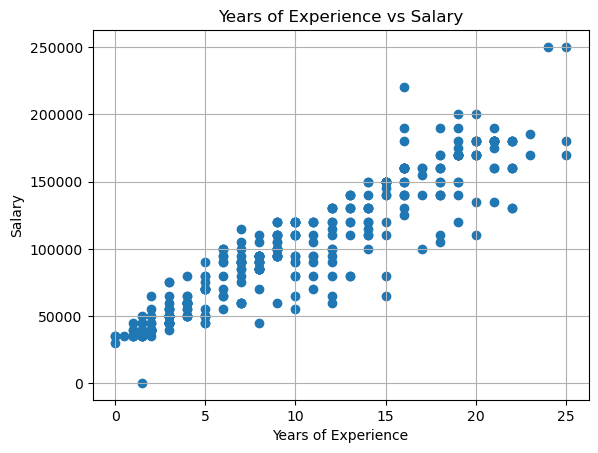

In [3]:
print('Basic infos about the dataset')
df1.info()

print()

print('Summary statistics')
display(df1.describe())

# Getting the column of years of experience and salary then converting it to NumPy array
x = df1.loc[:,'Years of Experience'].to_numpy()
y = df1.loc[:,'Salary'].to_numpy()

# Visualizing the correlation between years of experience and salary using scatterplot
print("Scatterplot of the correlation between 'years of experience' and 'salary'")
plt.scatter(x, y)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

### Step 4: Data preprocessing

In [4]:
# Function for assigning numeric representation to non-numeric columns
def to_numeric(col):
    df1[col] = pd.factorize(df1[col].to_numpy())[0]

# Assigning numeric representation to Gender, Education Level and each Job Title
to_numeric('Gender')
to_numeric('Education Level')
to_numeric('Job Title')

# Dropping the two (2) rows with nan values
df1.dropna(inplace=True)

# I dropped the 'age' column because I think it's not a necessary feature. After all, I already have 'years of experience' column.
final_df = df1.drop(['Age'], axis=1)

print("Final Dataset")
display(final_df)

Final Dataset


,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,0,0,5.0,90000.0
1,1,1,1,3.0,65000.0
2,0,2,2,15.0,150000.0
3,1,0,3,7.0,60000.0
4,0,1,4,20.0,200000.0
...,...,...,...,...,...
370,1,0,92,8.0,85000.0
371,0,1,55,19.0,170000.0
372,1,0,117,2.0,40000.0
373,0,0,171,7.0,90000.0


### Step 5: Feature selection
I used *SelectKBest* to run a chi-squared statistical test and find the features that contributes the most in finding the correct output. *(This section is actually not necessary. I just did it for the sake of practice.)*

In [5]:
from sklearn.feature_selection import SelectKBest, chi2

# Selecting the input data (columns 1-4) and output data (salary column)
x = final_df.iloc[:, 0:4]
y = final_df.iloc[:, -1]

# Selecting the top 3 features
top_feats = SelectKBest(score_func=chi2, k=3)
fit = top_feats.fit(x, y)

# Creating a dataframe for the scores and columns
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# Combining the features and their corresponding scores in one df
feat_scores = pd.concat([df_columns, df_scores], axis=1)
feat_scores.columns =  ['Features', 'Score']
feat_scores.sort_values(by='Score')

# Based on the results, the top 3 features are:
# 1. Years of Experience (1427)
# 2. Job Title (1393)
# 3. Education Level (225)


,Features,Score
0,Gender,27.551860
1,Education Level,225.426483
2,Job Title,1393.051424
3,Years of Experience,1427.570622


### Step 6: Building the Model
I used Random Forest Regressor

In [6]:
X = final_df[['Years of Experience', 'Job Title', 'Education Level']] # Top 3 features
Y = final_df[['Salary']] # Target output

# Splitting the dataset into train and test sets (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=28)

# Training the model
reg_model = RandomForestRegressor(n_estimators=200, random_state=0)
reg_model.fit(x_train, y_train)

c:\Users\acer\anaconda3\envs\ml_environment\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200, random_state=0)

### Step 7: Evaluating the Model's Performance
Evaluating the how well the model performed.

c:\Users\acer\anaconda3\envs\ml_environment\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Regression Metrics
Mean Absolute Error: 7868.640396825398
Out-of-bag score: 0.8871033308063755

Comparison between the predicted salary and actual salary.


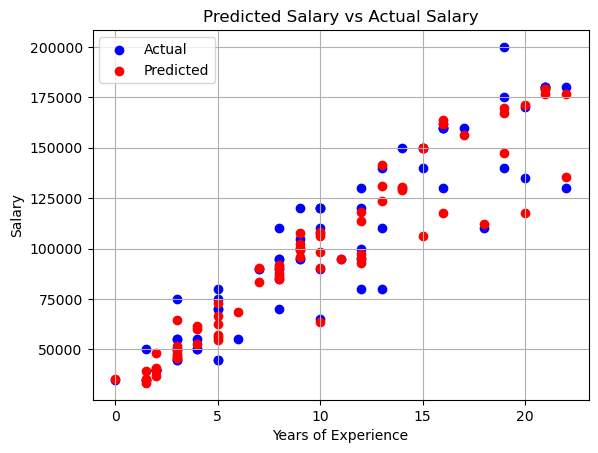

In [7]:
from sklearn.metrics import mean_absolute_error

# Predict the target values of the test set
y_predict = reg_model.predict(x_test)

MEA = mean_absolute_error(y_test, y_predict)
random_forest_oob = RandomForestRegressor(oob_score=True)
random_forest_oob.fit(x_train, y_train)

'''
Quick Guide to the Regression Metrics.
    MAE - This metric measures the average difference between the predicted and actual values. A lower MAE indicates better performance.
    Out-of-bag score - represents an estimate of how well the model is likely to perform on new, unseen data without the need for a separate validation dataset (the closer to 1, the better).
'''

print("Regression Metrics")
print(f"Mean Absolute Error: {MEA}")
print(f"Out-of-bag score: {random_forest_oob.oob_score_}")

print()

# Visualizing the predicted salary and actual salary using scatterplots
print("Comparison between the predicted salary and actual salary.")
plt.scatter(x_test['Years of Experience'], y_test, color="blue", label="Actual")
plt.scatter(x_test['Years of Experience'], y_predict, color="red", label="Predicted")
plt.title("Predicted Salary vs Actual Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend(loc="best")
plt.show()
